In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/datasets/Toddler Autism dataset July 2018.csv")
data


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
# Detecting any missing values
data.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data=data.drop("Case_No",axis=1)

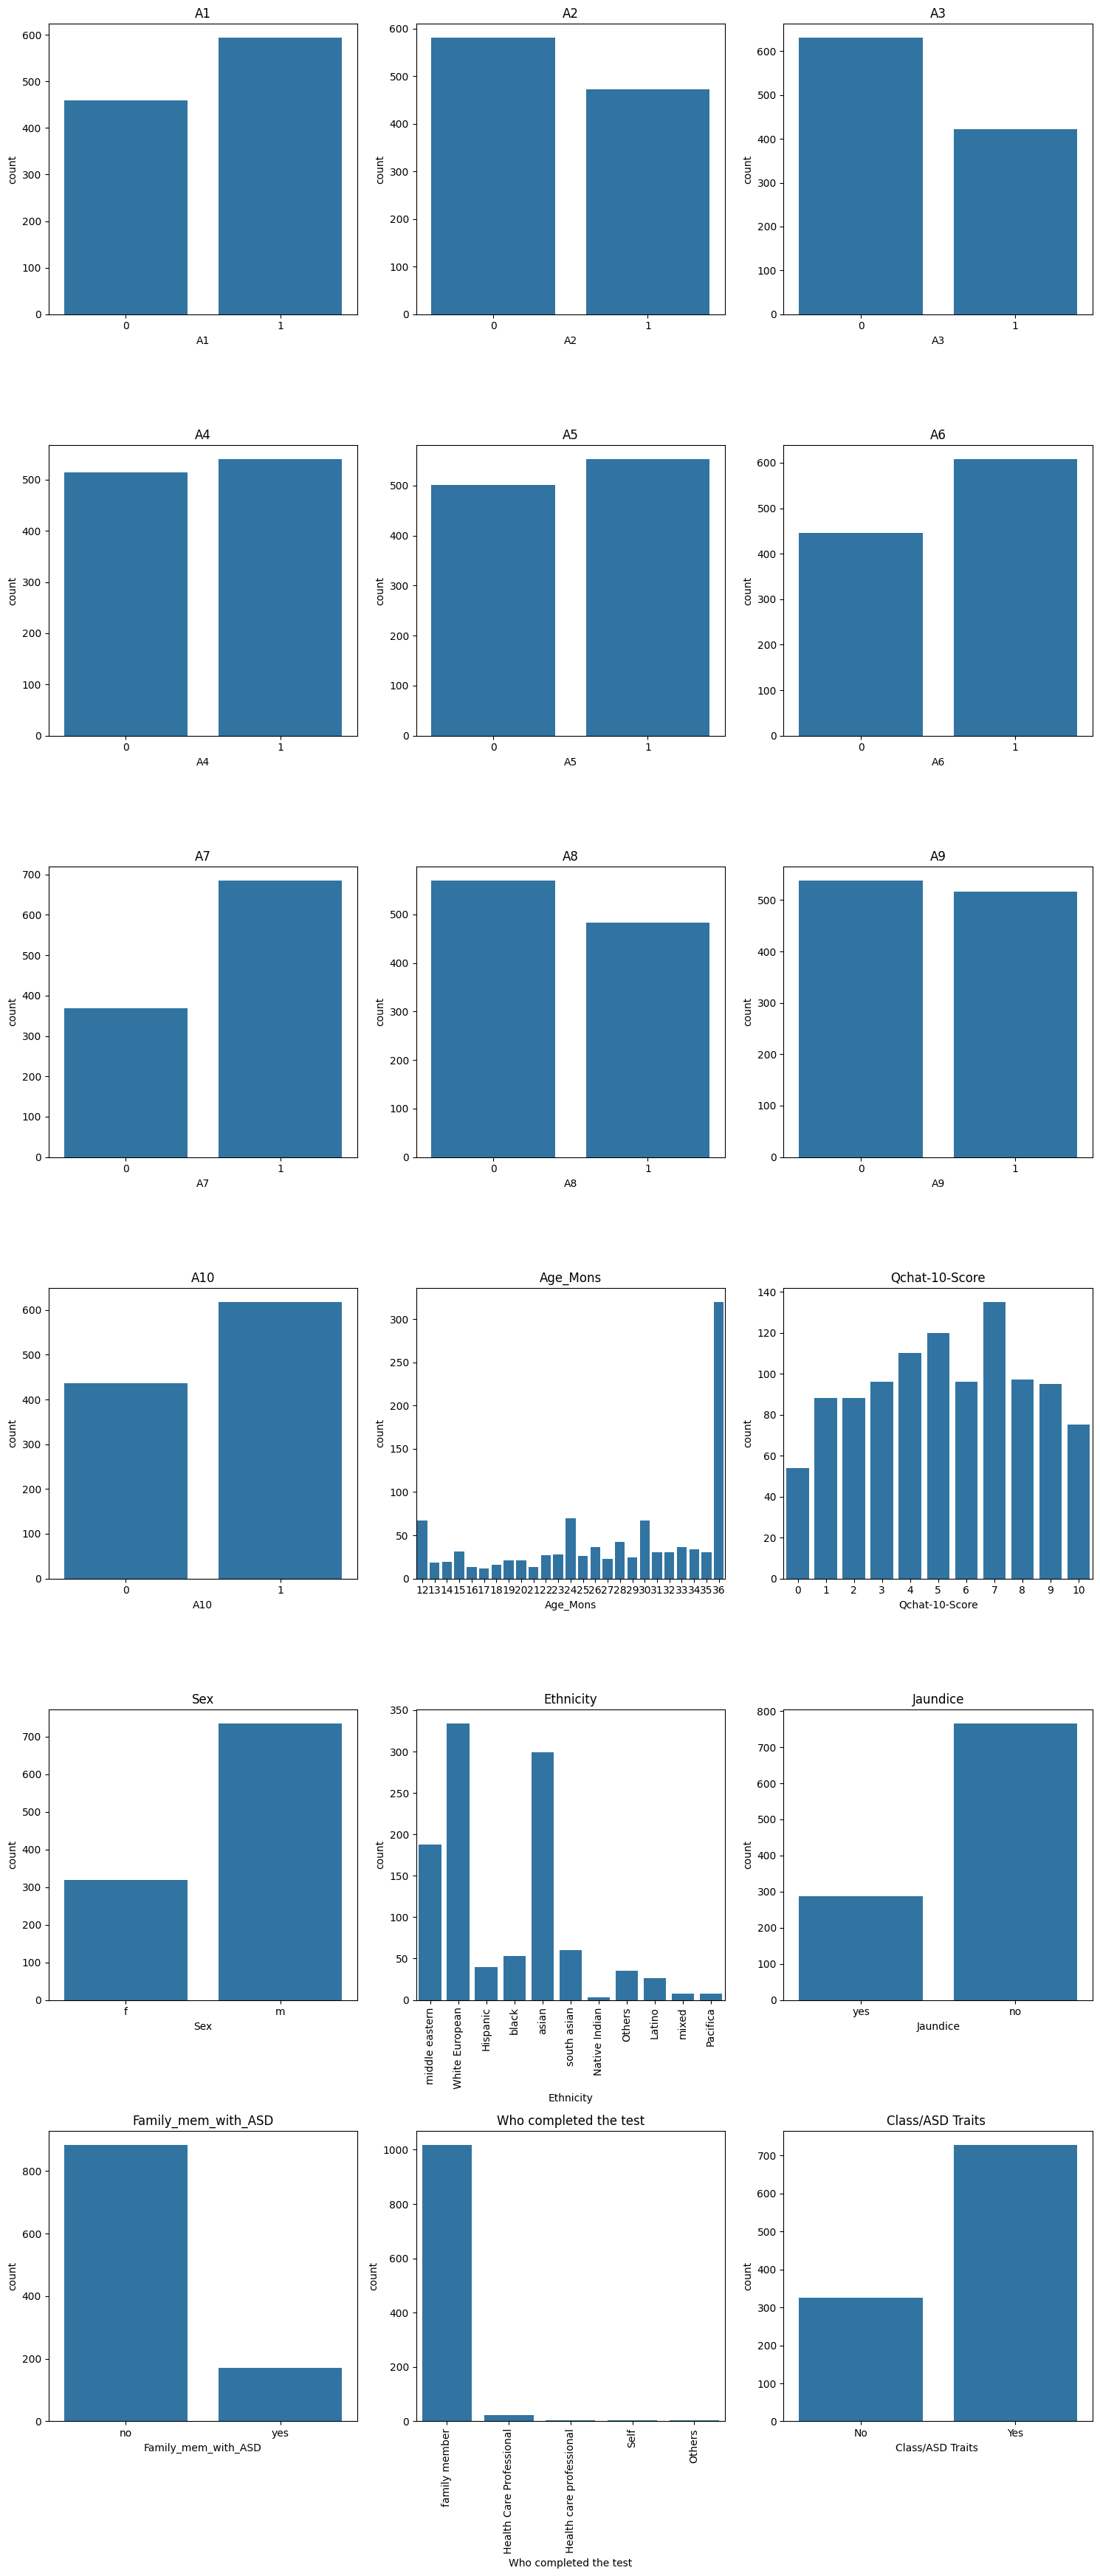

In [ ]:
# Countplot for each feature
fig,axes=plt.subplots(6,3,figsize=(15,35))
axes=axes.ravel()
for i , col in enumerate(data.iloc[:,:]):
    sns.countplot(x=data[col],ax=axes[i])
    axes[i].set_title(col)
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
plt.tight_layout()
plt.show()

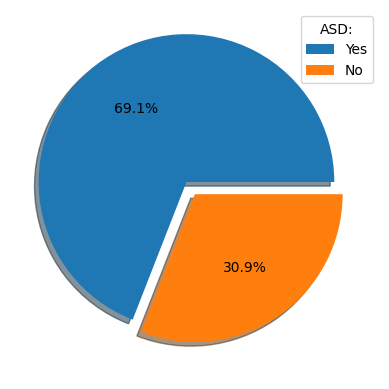

In [ ]:
labels = ["Yes", "No"]
myexplode = [0.1, 0]
plt.pie(data.groupby('Class/ASD Traits ').size().reindex(labels),explode = myexplode, shadow = True,autopct='%1.1f%%')
plt.legend(title = "ASD:",labels = labels)
plt.show()

In [ ]:
data.groupby('Ethnicity').size()

Ethnicity
Hispanic           40
Latino             26
Native Indian       3
Others             35
Pacifica            8
White European    334
asian             299
black              53
middle eastern    188
mixed               8
south asian        60
dtype: int64

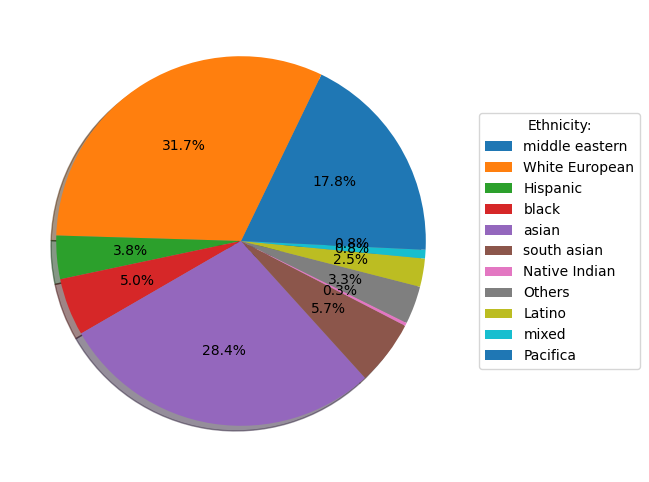

In [ ]:
labels = ['middle eastern', 'White European', 'Hispanic', 'black', 'asian',
       'south asian', 'Native Indian', 'Others', 'Latino', 'mixed',
       'Pacifica']
plt.figure(figsize=(10, 6))
plt.pie(data.groupby('Ethnicity').size().reindex(labels), shadow = True,autopct='%1.1f%%')
plt.legend(title = "Ethnicity:",labels = labels,loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

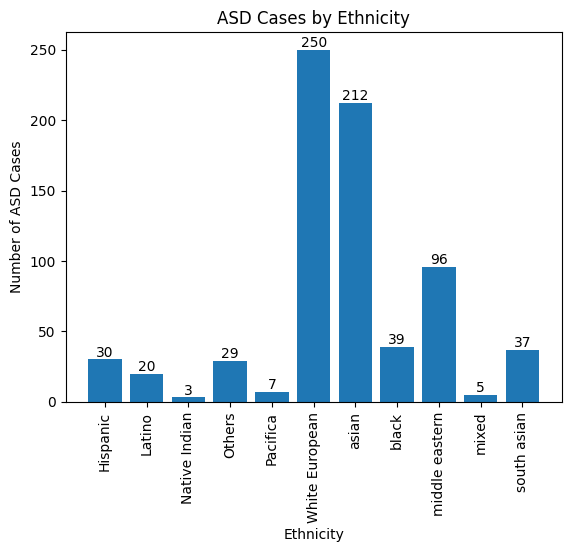

In [ ]:
asd_counts_ethnicity = data[data['Class/ASD Traits '] == 'Yes'].groupby('Ethnicity').size()
bars=plt.bar(asd_counts_ethnicity.index, asd_counts_ethnicity.values)
plt.xlabel('Ethnicity')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Ethnicity')
plt.xticks(rotation=90)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
data.groupby('Sex').size()

Sex
f    319
m    735
dtype: int64

In [ ]:
data.groupby('Jaundice').size()

Jaundice
no     766
yes    288
dtype: int64

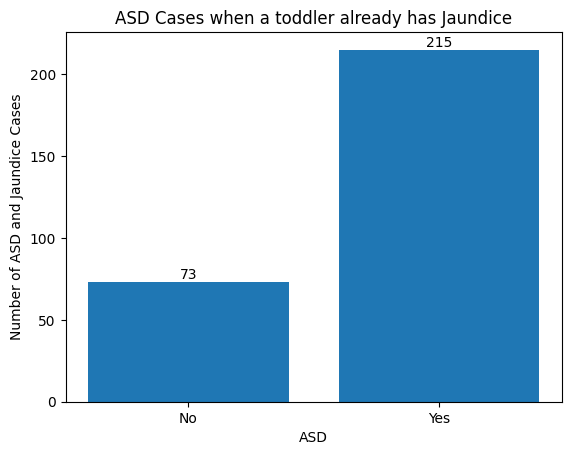

In [ ]:
# Toddlers who have Jaundice and then they have ASD
asd_counts_jaundice = data[data['Jaundice']=='yes'].groupby('Class/ASD Traits ').size()
bars=plt.bar(asd_counts_jaundice.index, asd_counts_jaundice.values)
plt.xlabel('ASD')
plt.ylabel('Number of ASD and Jaundice Cases')
plt.title('ASD Cases when a toddler already has Jaundice')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
d = pd.DataFrame()
d["Age"]=(data["Age_Mons"]/12).astype(int)
d["ASD"]=data['Class/ASD Traits ']

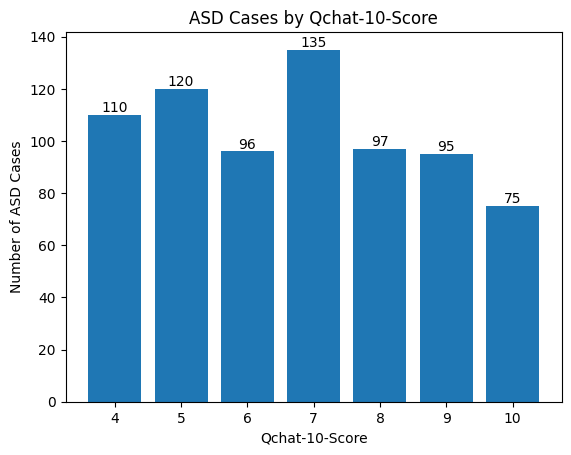

In [ ]:
asd_counts = data[data['Class/ASD Traits '] == 'Yes'].groupby('Qchat-10-Score').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Qchat-10-Score')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Qchat-10-Score')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.xticks()
plt.show()

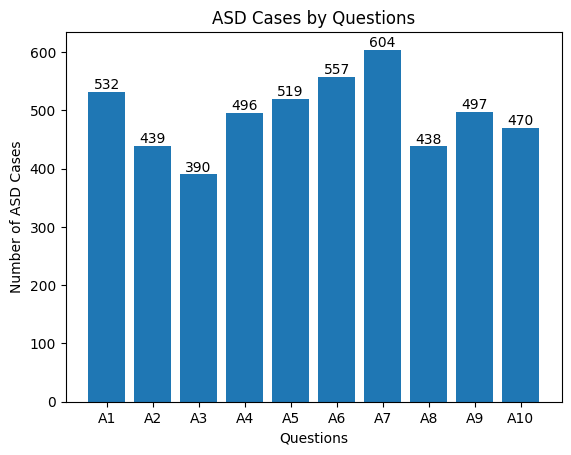

In [ ]:
df=data[data['Class/ASD Traits '] == 'Yes']
sums=df[['A1', 'A2', 'A3', 'A4','A5','A6','A7','A8','A9','A10']].sum()
bars=plt.bar(sums.index,sums.values)
plt.xlabel('Questions')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Questions')
plt.xticks(ticks=range(len(sums.index)), labels=sums.index)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()

In [ ]:
#data preprocessing
pd.set_option('display.max_columns', None)

In [ ]:
d1 = pd.read_csv("/content/drive/MyDrive/datasets/Toddler Autism dataset July 2018.csv")
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
d1.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

In [ ]:
d1["Age_Mons"]=(d1["Age_Mons"]/12).astype(int)
d1.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,2,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,3,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,3,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,2,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,1,9,f,White European,no,yes,family member,Yes


In [ ]:
d2 = pd.read_csv("/content/drive/MyDrive/datasets/data_csv.csv")
d2.head()

,CASE_NO_PATIENT'S,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Social_Responsiveness_Scale,Age_Years,Qchat_10_Score,Speech Delay/Language Disorder,Learning disorder,Genetic_Disorders,Depression,Global developmental delay/intellectual disability,Social/Behavioural Issues,Childhood Autism Rating Scale,Anxiety_disorder,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,1,0,0,0,0,0,0,1,1,0,1,3.0,2,3.0,Yes,Yes,Yes,Yes,Yes,Yes,1,Yes,F,middle eastern,Yes,No,Family Member,No
1,2,1,1,0,0,0,1,1,0,0,0,6.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,2,Yes,M,White European,Yes,No,Family Member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,7.0,3,4.0,Yes,Yes,Yes,Yes,Yes,Yes,4,Yes,M,Middle Eastern,Yes,No,Family Member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,1.0,2,10.0,Yes,Yes,No,Yes,Yes,Yes,2,Yes,M,Hispanic,No,No,Family Member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,3.0,2,9.0,Yes,Yes,No,Yes,Yes,Yes,1,Yes,F,White European,No,No,Family Member,Yes


In [ ]:
d2.isna().sum()

CASE_NO_PATIENT'S                                      0
A1                                                     0
A2                                                     0
A3                                                     0
A4                                                     0
A5                                                     0
A6                                                     0
A7                                                     0
A8                                                     0
A9                                                     0
A10_Autism_Spectrum_Quotient                           0
Social_Responsiveness_Scale                            9
Age_Years                                              0
Qchat_10_Score                                        39
Speech Delay/Language Disorder                         0
Learning disorder                                      0
Genetic_Disorders                                      0
Depression                     

In [ ]:
d2=d2.dropna()


In [ ]:
d2.isna().sum()

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [ ]:
d3 = pd.read_csv("/content/drive/MyDrive/datasets/autism_screening.csv")
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
d3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
d3=d3.dropna()

In [ ]:
d3.isna().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [ ]:
d3["age"]=(d3["age"]/12).astype(int)
d3.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,2,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,2,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,2,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,2,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,3,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


In [ ]:
print(d1.columns)
print(d2.columns)
print(d3.columns)

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')
Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits'],
      dtype='object')
Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 

In [ ]:
d1=d1.iloc[:,1:]
d2=pd.concat([d2.iloc[:,1:11],d2.iloc[:,[12,13,22,23,24,25,26,27]]],axis=1)
d3=pd.concat([d3.iloc[:,0:11],d3.iloc[:,[17,11,12,13,14,19,20]]],axis=1)

In [ ]:
d1.columns = d2.columns
d3.columns = d2.columns

In [ ]:
for i in d1.columns:
    print(i)
    print(f"{d1[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[2 3 1]

Qchat_10_Score
[ 3  4 10  9  8  5  6  2  0  7  1]

Sex
['f' 'm']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica']

Jaundice
['yes' 'no']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others']

ASD_traits
['No' 'Yes']



In [ ]:
for i in d2.columns:
    print(i)
    print(f"{d2[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  7.  0.  1.]

Sex
['F' 'M']

Ethnicity
['middle eastern' 'White European' 'Middle Eastern' 'Hispanic' 'Black'
 'Asian' 'South Asian' 'Native Indian' 'Others' 'black' 'asian' 'Latino'
 'Mixed' 'south asian' 'mixed' 'PaciFica']

Jaundice
['Yes' 'No']

Family_mem_with_ASD
['No' 'Yes']

Who_completed_the_test
['Family Member' 'Health Care Professional' 'Self' 'Family member'
 'Others' 'School and NGO']

ASD_traits
['No' 'Yes']



In [ ]:
for i in d3.columns:
    print(i)
    print(f"{d3[i].unique()}\n")

A1
[1 0]

A2
[1 0]

A3
[1 0]

A4
[1 0]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[0 1]

Age_Years
[ 2  3  1  5  4 31]

Qchat_10_Score
[ 6.  5.  8.  2.  9. 10.  4.  3.  0.  1.  7.]

Sex
['f' 'm']

Ethnicity
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']

Jaundice
['no' 'yes']

Family_mem_with_ASD
['no' 'yes']

Who_completed_the_test
['Self' 'Parent' '?' 'Health care professional' 'Relative' 'Others']

ASD_traits
['NO' 'YES']



In [ ]:
data=pd.concat([d1,d2,d3],axis=0)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10_Autism_Spectrum_Quotient,Age_Years,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,ASD_traits
0,0,0,0,0,0,0,1,1,0,1,2,3.0,f,middle eastern,yes,no,family member,No
1,1,1,0,0,0,1,1,0,0,0,3,4.0,m,White European,yes,no,family member,Yes
2,1,0,0,0,0,0,1,1,0,1,3,4.0,m,middle eastern,yes,no,family member,Yes
3,1,1,1,1,1,1,1,1,1,1,2,10.0,m,Hispanic,no,no,family member,Yes
4,1,1,0,1,1,1,1,1,1,1,1,9.0,f,White European,no,yes,family member,Yes


In [ ]:
data.shape

(3679, 18)

In [ ]:
for i in data.columns:
    print(i)
    print(f"{data[i].unique()}\n")

A1
[0 1]

A2
[0 1]

A3
[0 1]

A4
[0 1]

A5
[0 1]

A6
[0 1]

A7
[1 0]

A8
[1 0]

A9
[0 1]

A10_Autism_Spectrum_Quotient
[1 0]

Age_Years
[ 2  3  1 15 18 12  4  5  9  6  8  7 17 16 14 11 13 10 31]

Qchat_10_Score
[ 3.  4. 10.  9.  8.  5.  6.  2.  0.  7.  1.]

Sex
['f' 'm' 'F' 'M']

Ethnicity
['middle eastern' 'White European' 'Hispanic' 'black' 'asian'
 'south asian' 'Native Indian' 'Others' 'Latino' 'mixed' 'Pacifica'
 'Middle Eastern' 'Black' 'Asian' 'South Asian' 'Mixed' 'PaciFica'
 'White-European' '?' 'Middle Eastern ' 'Pasifika' 'Turkish' 'others']

Jaundice
['yes' 'no' 'Yes' 'No']

Family_mem_with_ASD
['no' 'yes' 'No' 'Yes']

Who_completed_the_test
['family member' 'Health Care Professional' 'Health care professional'
 'Self' 'Others' 'Family Member' 'Family member' 'School and NGO' 'Parent'
 '?' 'Relative']

ASD_traits
['No' 'Yes' 'NO' 'YES']



In [ ]:
replacements = {
    'f': 'F',
    'm': 'M',
}
data['Sex'] = data['Sex'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Jaundice'] = data['Jaundice'].replace(replacements)
replacements = {
    'yes': 'Yes',
    'no': 'No',
}
data['Family_mem_with_ASD'] = data['Family_mem_with_ASD'].replace(replacements)
replacements = {
    'YES': 'Yes',
    'NO': 'No',
}
data['ASD_traits'] = data['ASD_traits'].replace(replacements)

In [ ]:
replacements = {
    'middle eastern': 'Middle Eastern',
    'Middle Eastern ': 'Middle Eastern',
    'mixed': 'Mixed',
    'asian': 'Asian',
    'black': 'Black',
    'south asian': 'South Asian',
    'PaciFica':'Pacifica',
    'Pasifika':'Pacifica'

}
data['Ethnicity'] = data['Ethnicity'].replace(replacements)

In [ ]:
replacements = {
    'Health care professional':'Health Care Professional',
    'family member':'Family Member',
    'Family member':'Family Member'
}
data['Who_completed_the_test'] = data['Who_completed_the_test'].replace(replacements)

In [ ]:
X = data.drop("ASD_traits",axis=1)
y = data["ASD_traits"]

In [ ]:
#One Hot Encoding
X=pd.get_dummies(X,columns=["Ethnicity", "Who_completed_the_test"], drop_first=True)

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
X['Sex']=le.fit_transform(X['Sex'])
X['Jaundice']=le.fit_transform(X['Jaundice'])
X['Family_mem_with_ASD']=le.fit_transform(X['Family_mem_with_ASD'])

In [ ]:
#Splitting of Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=69)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [ ]:
#Model Implementation
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix
def train_model(model, X_train, y_train, X_test, y_test):

    model.fit(X_train, y_train)
    global y_pred,y_score
    y_score = model.predict_proba(X_test)[:,1]
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    matrix=confusion_matrix(y_test,y_pred)
    print("Confusion Matrix is: ")
    print(matrix)
    print("\n\nScore Table is: ")
    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])

    return score_df

In [ ]:
# # XGBoost Classifier
from xgboost import XGBClassifier
model = XGBClassifier() #max_dept=3,learning_rate=0.3
xg = train_model(model, X_train, y_train, X_test, y_test)
xg.index = ["XGBoost Classifier"]
print(xg.index)
print(xg)


Confusion Matrix is: 
[[339   5]
 [  2 390]]


Score Table is: 
Index(['XGBoost Classifier'], dtype='object')
                    accuracy  precision    recall        f1
XGBoost Classifier  0.990489   0.987342  0.994898  0.991105


In [ ]:
# GradientBoostingClassifier_____for_____comparison
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
gb = train_model(model, X_train, y_train, X_test, y_test)
gb.index = ["Gradient Boosting Classifier"]
print(gb)

Confusion Matrix is: 
[[337   7]
 [  3 389]]


Score Table is: 
                              accuracy  precision    recall       f1
Gradient Boosting Classifier  0.986413   0.982323  0.992347  0.98731


In [ ]:
# AdaBoostClassifier_____________for__________comparison
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
adb = train_model(model, X_train, y_train, X_test, y_test)
adb.index = ["AdaBoost Classifier"]
print(adb)

Confusion Matrix is: 
[[327  17]
 [ 11 381]]


Score Table is: 
                     accuracy  precision    recall        f1
AdaBoost Classifier  0.961957   0.957286  0.971939  0.964557


In [ ]:
y_score

array([0.45793871, 0.47687563, 0.54229349, 0.50863456, 0.43288826,
       0.48054996, 0.53011174, 0.44909506, 0.55741465, 0.52148386,
       0.56795092, 0.51845453, 0.54507164, 0.46109079, 0.47687563,
       0.46888845, 0.48029813, 0.55906122, 0.54633743, 0.50497013,
       0.48879809, 0.47075289, 0.51938917, 0.52630848, 0.5228136 ,
       0.53902213, 0.52748369, 0.44782257, 0.48849894, 0.49675867,
       0.47865649, 0.56570713, 0.50038632, 0.48055294, 0.48865341,
       0.49544169, 0.53160285, 0.53945746, 0.48487401, 0.53518674,
       0.47013481, 0.48663937, 0.48697852, 0.53042775, 0.52672591,
       0.54682844, 0.45438859, 0.46783188, 0.45664614, 0.47503659,
       0.45824353, 0.47190514, 0.5656364 , 0.45558722, 0.52376037,
       0.45237084, 0.55439695, 0.57301748, 0.55701356, 0.55878982,
       0.49350612, 0.50773819, 0.51276732, 0.49334553, 0.47637891,
       0.4772271 , 0.53272497, 0.54298665, 0.47326568, 0.52306783,
       0.45907234, 0.52595324, 0.5235    , 0.45382223, 0.54613

In [ ]:
from sklearn.metrics import roc_curve
fpr_xgb,tpr_xgb,thresh = roc_curve(y_test,y_score)

In [ ]:
thresh

array([1.66217687, 0.66217687, 0.65853481, 0.57714908, 0.5765803 ,
       0.57492103, 0.57473862, 0.57337049, 0.57301748, 0.56922281,
       0.56903978, 0.56818208, 0.56795092, 0.56404657, 0.56379336,
       0.5635725 , 0.56314445, 0.5576243 , 0.55750137, 0.55710631,
       0.55709981, 0.55498223, 0.55496691, 0.55477285, 0.54507164,
       0.54498726, 0.54274202, 0.54229349, 0.53518953, 0.53518674,
       0.51276732, 0.5125973 , 0.51227755, 0.5122352 , 0.51190301,
       0.51188768, 0.5111296 , 0.51106065, 0.51069417, 0.51065763,
       0.50960336, 0.50908413, 0.50891421, 0.50891378, 0.50853494,
       0.50853095, 0.50774051, 0.50773819, 0.50736957, 0.50712984,
       0.50692466, 0.50620635, 0.50504972, 0.50497013, 0.50481866,
       0.50420144, 0.50307065, 0.5021707 , 0.50153936, 0.50140625,
       0.50140533, 0.50114312, 0.50091065, 0.50038632, 0.50001127,
       0.49930248, 0.49748659, 0.49675867, 0.49667336, 0.49632674,
       0.49539863, 0.49493954, 0.49480151, 0.49430955, 0.49350

In [ ]:
import plotly.graph_objects as go
trace0 = go.Scatter(
    x = fpr_xgb,
    y = tpr_xgb,
    mode = 'lines',
    name = 'ROC curve'
)

n = 10
indices = np.arange(len(thresh))%n == 0

trace1 = go.Scatter(
    x = fpr_xgb[indices],
    y = tpr_xgb[indices],
    mode = 'markers+text',
    name = 'Threshold Points',
    text = [f"Thr={thr:.2f}" for thr in thresh[indices] ],
    textposition = 'top center'

)

trace2 = go.Scatter(
    x = [0,1],
    y = [0,1],
    mode = 'lines',
    name = 'Random (Area = 0.5)',
    line = dict(dash= 'dash')

)

data = [trace0, trace1, trace2]
layout = go.Layout(
    title='XGB ROC_CURVE',
    xaxis=dict(title='False Positive Rate'),
    yaxis=dict(title='True Positive Rate'),
    autosize=False,
    width=800,
    height=800,
    showlegend=False
)

# Define figure and add data
fig = go.Figure(data=data, layout=layout)

# Show figure
fig.show()


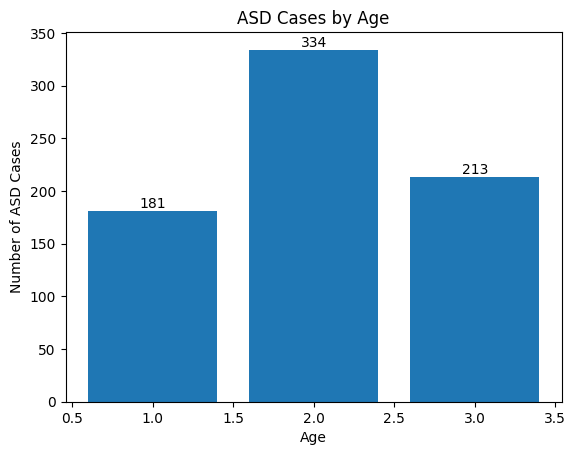

In [ ]:
asd_counts = d[d['ASD'] == 'Yes'].groupby('Age').size()
bars=plt.bar(asd_counts.index, asd_counts.values)
plt.xlabel('Age')
plt.ylabel('Number of ASD Cases')
plt.title('ASD Cases by Age')
plt.xticks()
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
plt.show()